## This script contains:
#### 01. Import libraries
#### 02. Import data
#### 03. Exploring relationships
        Correlations
        Scatterplots
        Pair plots
        Categorical plots
#### 04. Information gained from analysis
#### 05. Hypothesis

# 01. Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# check the version of matplot, may inffluence graphs

matplotlib.__version__

'3.7.0'

In [3]:
# enables visualtions without calling them

%matplotlib inline

# 02. Import data

In [4]:
# create path to folder

path = r'C:\Users\ejgor\OneDrive\Data Analytics\Data Immersion\Achievement 6 - Advanced Analytics & Dashboard Design\World Happiness Report Analysis'

In [5]:
# import cleaned dataframe

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'WHR_2015-2019.csv'), index_col = False)

In [6]:
# check if df was imported correctly

df.shape

(782, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     782 non-null    object 
 1   Rank        782 non-null    int64  
 2   Score       782 non-null    float64
 3   Support     782 non-null    float64
 4   GDP         782 non-null    float64
 5   Health      782 non-null    float64
 6   Freedom     782 non-null    float64
 7   Generosity  782 non-null    float64
 8   Corruption  782 non-null    float64
 9   Year        782 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 61.2+ KB


In [8]:
df.head()

,Country,Rank,Score,Support,GDP,Health,Freedom,Generosity,Corruption,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [9]:
df.tail()

,Country,Rank,Score,Support,GDP,Health,Freedom,Generosity,Corruption,Year
777,Rwanda,152,3.334,0.359,0.711,0.614,0.555,0.217,0.411,2019
778,Tanzania,153,3.231,0.476,0.885,0.499,0.417,0.276,0.147,2019
779,Afghanistan,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025,2019
780,Central African Republic,155,3.083,0.026,0.000,0.105,0.225,0.235,0.035,2019
781,South Sudan,156,2.853,0.306,0.575,0.295,0.010,0.202,0.091,2019


In [10]:
df.describe()

,Rank,Score,Support,GDP,Health,Freedom,Generosity,Corruption,Year
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,78.698210,5.379018,0.916047,1.078392,0.612416,0.411091,0.178526,0.165536,2016.993606
std,45.182384,1.127456,0.407340,0.329548,0.248309,0.152880,0.119115,0.127329,1.417364
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,40.000000,4.509750,0.606500,0.869363,0.440183,0.309768,0.084860,0.067921,2016.000000
50%,79.000000,5.322000,0.982205,1.124735,0.647310,0.431000,0.155219,0.128445,2017.000000
75%,118.000000,6.189500,1.236187,1.327250,0.808000,0.531000,0.246864,0.236907,2018.000000
max,158.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.838075,0.819710,2019.000000


# 03. Exploring relationships

In [11]:
# happiest countries

happy_countries = df[['Country', 'Rank']].groupby('Country').mean().sort_values(by = 'Rank', ascending = True)
happy_countries.head()

,Rank
Country,
Denmark,2.2
Norway,2.8
Iceland,3.2
Switzerland,3.6
Finland,3.6


In [12]:
# saddest countries 

sad_countries = df[['Country', 'Rank']].groupby('Country').mean().sort_values(by = 'Rank', ascending = True)
sad_countries.tail()

,Rank
Country,
Tanzania,150.80
Rwanda,152.00
Syria,152.60
Central African Republic,153.25
Burundi,153.80


In [13]:
# What countries have the highest GDP per capita over the years?

rich_countries = df[['Country', 'GDP']].groupby('Country').mean().sort_values(by='GDP', ascending = False)
rich_countries.head()

,GDP
Country,
Iceland,1.492813
Trinidad & Tobago,1.484500
Denmark,1.447688
Ireland,1.445056
New Zealand,1.439729


In [14]:
# What countries have the lowest GDP per capita over the years?

poor_countries = df[['Country', 'GDP']].groupby('Country').mean().sort_values(by='GDP', ascending = False)
poor_countries.tail()

,GDP
Country,
Afghanistan,0.409753
Syria,0.355931
Benin,0.340470
Togo,0.323567
Central African Republic,0.000000


In [15]:
# What countries have the highest life expectancy over the years?

healthy_countries = df[['Country', 'Health']].sort_values(by='Health', ascending=False)
healthy_countries.head()

,Country,Health
659,Singapore,1.141
701,Hong Kong,1.122
683,Japan,1.088
655,Spain,1.062
631,Switzerland,1.052


In [16]:
# lowest life expectancy

low_life_expectancy = df[['Country', 'Health']].sort_values(by='Health', ascending=False)
low_life_expectancy.tail()

,Country,Health
582,Sierra Leone,0.0
760,Swaziland,0.0
268,Sierra Leone,0.0
453,Lesotho,0.0
122,Sierra Leone,0.0


## Univariate plots
#### These are the plots of each individual variable. They help us understand each attribute better.

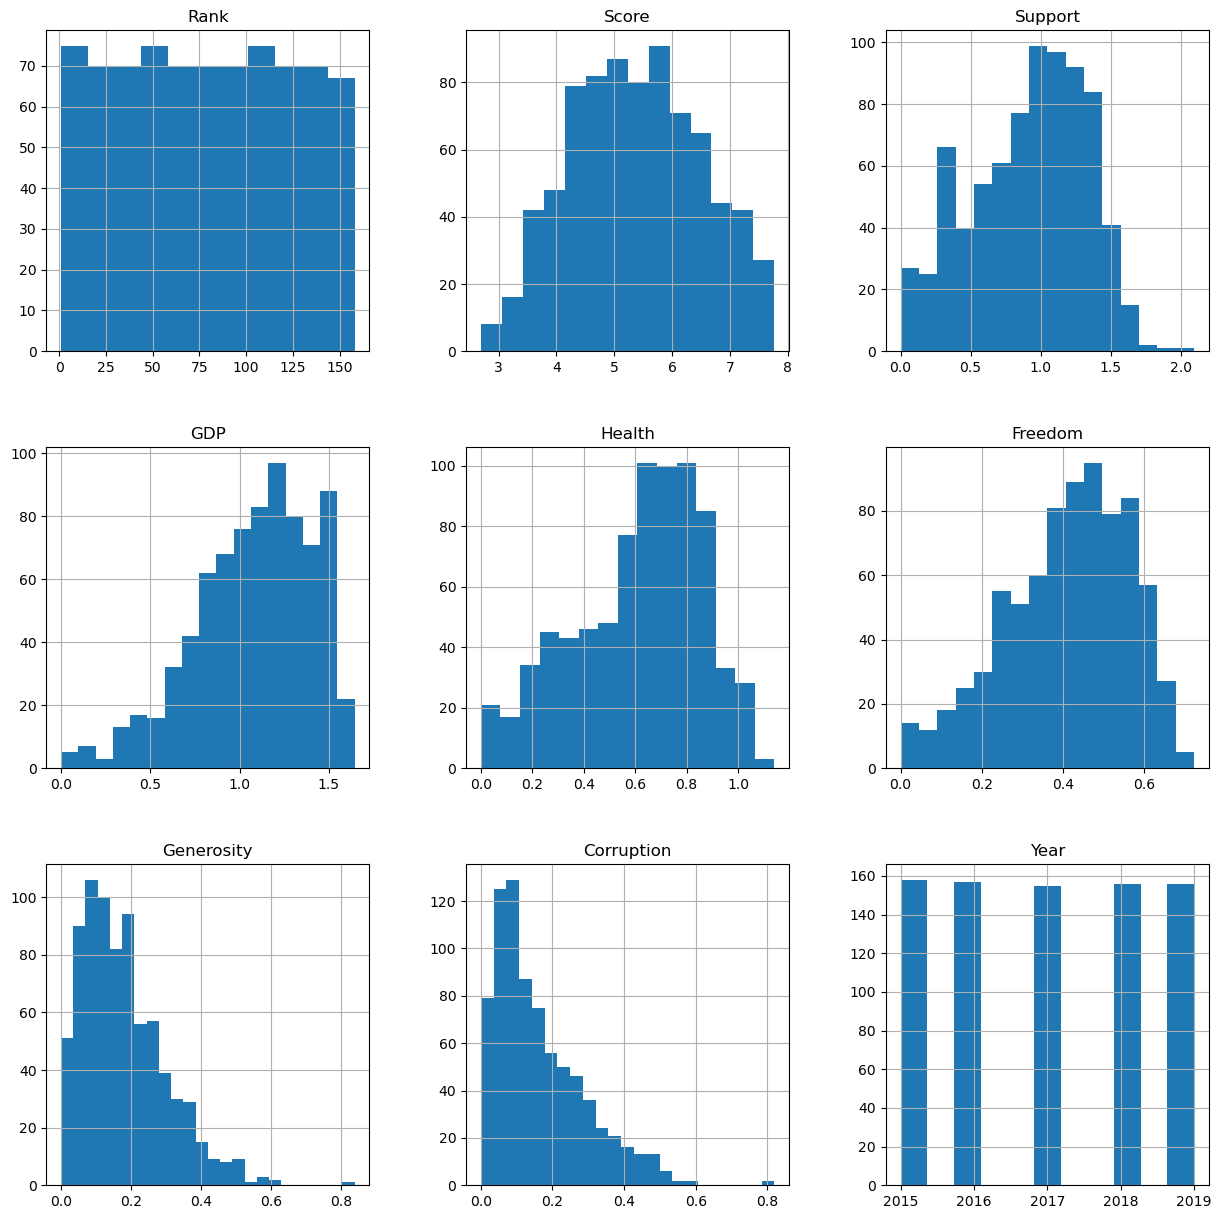

In [17]:
# checking the frequency distribution of the variables

df.hist(bins='auto', figsize=(15,15));

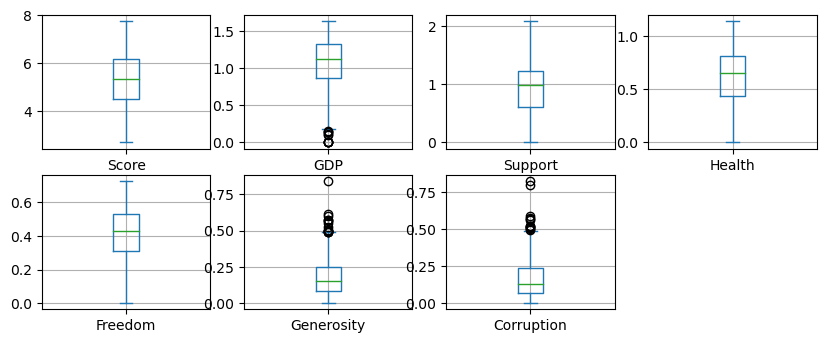

In [18]:
# check for outliers using boxplots

df[['Score', 'GDP', 'Support', 'Health', 'Freedom', 'Generosity', 'Corruption']].plot(kind='box', subplots=True, layout=(4,4), figsize=(10,8), grid=True);

#### GDP, Generosity, and Corruption all have outliers.

## Bivariate plots
#### This is used to understand the relationship between variables.

## Correlations

In [19]:
df.columns

Index(['Country', 'Rank', 'Score', 'Support', 'GDP', 'Health', 'Freedom',
       'Generosity', 'Corruption', 'Year'],
      dtype='object')

In [20]:
# create subset

df_sub = df[['Rank', 'Score', 'Support', 'GDP', 'Health', 'Freedom', 'Generosity', 'Corruption', 'Year']]

In [21]:
# create a correlation matrix using pandas

df_sub.corr()

,Rank,Score,Support,GDP,Health,Freedom,Generosity,Corruption,Year
Rank,1.000000,-0.992066,-0.794791,-0.644842,-0.743655,-0.537942,-0.206222,-0.229953,-0.007768
Score,-0.992066,1.000000,0.789284,0.648799,0.742456,0.551258,0.223577,0.254079,0.007065
Support,-0.794791,0.789284,1.000000,0.585966,0.784338,0.340511,0.121173,0.126845,0.019768
GDP,-0.644842,0.648799,0.585966,1.000000,0.572650,0.420361,0.192008,-0.110866,0.367431
Health,-0.743655,0.742456,0.784338,0.572650,1.000000,0.340745,0.092768,0.131577,0.130302
Freedom,-0.537942,0.551258,0.340511,0.420361,0.340745,1.000000,0.358228,0.325347,0.010353
Generosity,-0.206222,0.223577,0.121173,0.192008,0.092768,0.358228,1.000000,0.131638,0.150721
Corruption,-0.229953,0.254079,0.126845,-0.110866,0.131577,0.325347,0.131638,1.000000,-0.427234
Year,-0.007768,0.007065,0.019768,0.367431,0.130302,0.010353,0.150721,-0.427234,1.000000


In [22]:
# check current directory

cwd = os.getcwd()
cwd

'C:\\Users\\ejgor\\OneDrive\\Data Analytics\\Data Immersion\\Achievement 6 - Advanced Analytics & Dashboard Design\\World Happiness Report Analysis\\03 Scripts'

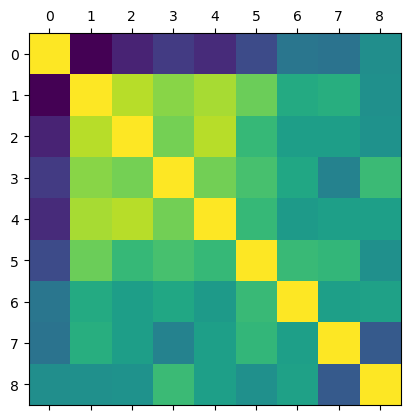

In [23]:
# create a correlation heatmap using matplotlib

plt.matshow(df_sub.corr())
plt.show()

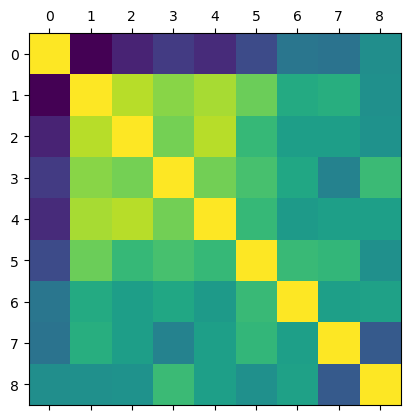

In [24]:
# Save figure in current dirrectory

plt.matshow(df_sub.corr())
plt.savefig("out.png")

Text(0.5, 1.0, 'Correlation Matrix')

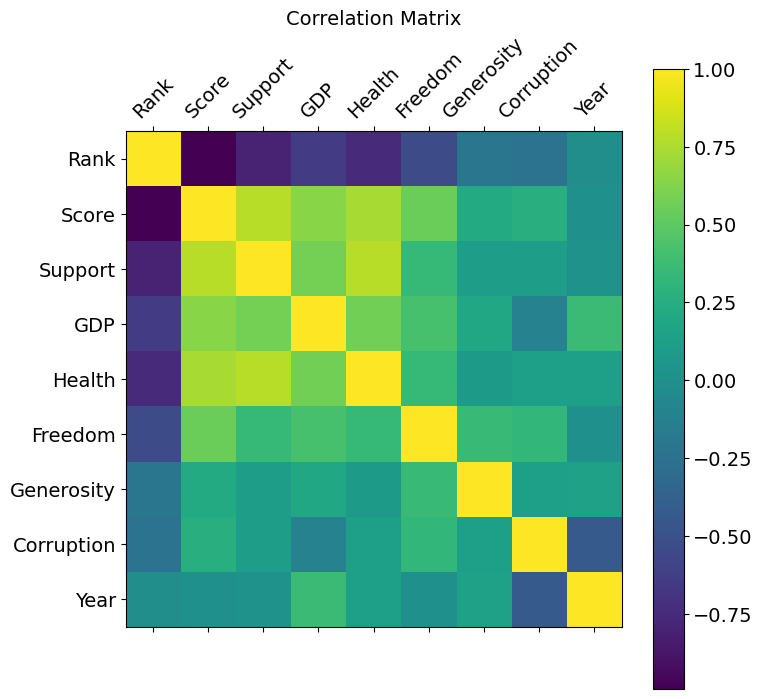

In [25]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

## Correlation heatmap

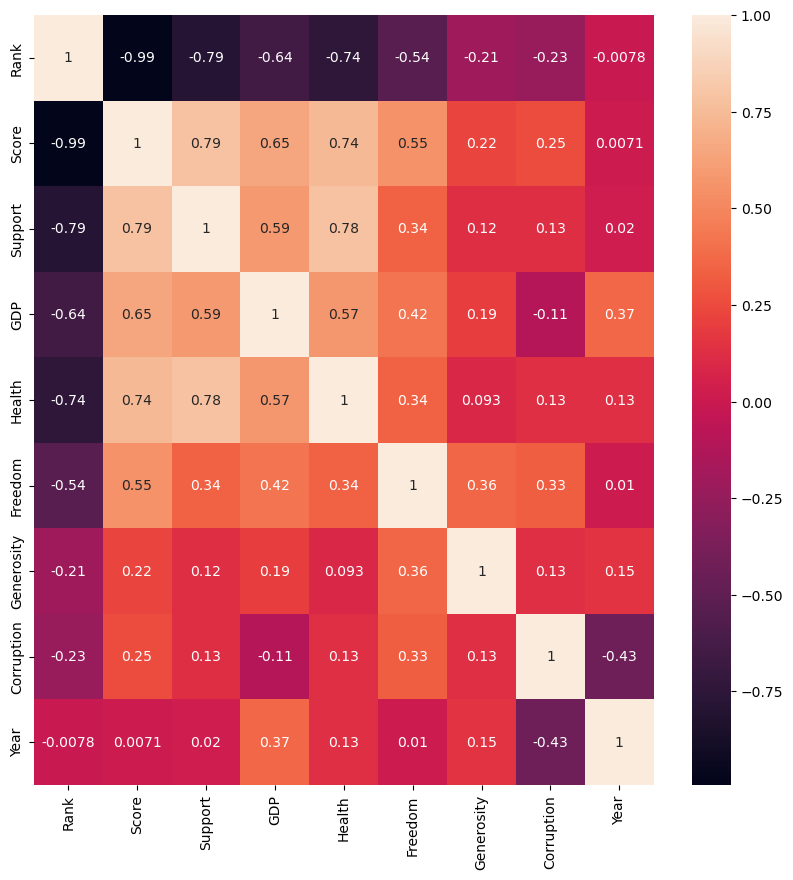

In [26]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

#### The darker the box, the stronger/higher the correlation.
#### Score has a strong correlation with GDP and Health. It has low correlates with Generosity and Perceptions of Corruption.
#### Also, there is an inverse relationship between Happiness rank and Happiness score; the higher the score, the lower the rank.

## Scatterplots

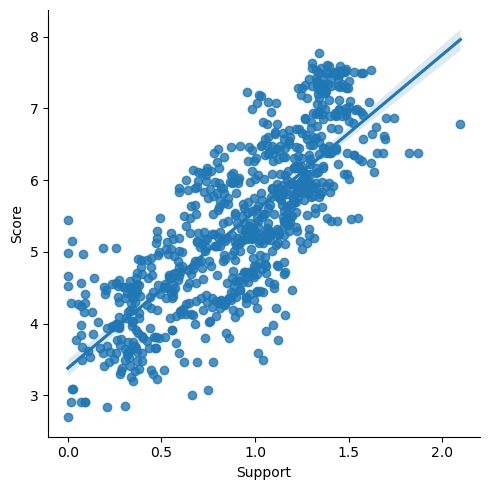

In [27]:
# Create a scatterplot for the 'GDP' and 'Score' columns in seaborn

sns.lmplot(x = 'Support', y = 'Score', data = df)

#### Data points are clumped tightly around trend line. GDP and Score a strong positive relationship, so the higher the GDP, the higher the score.

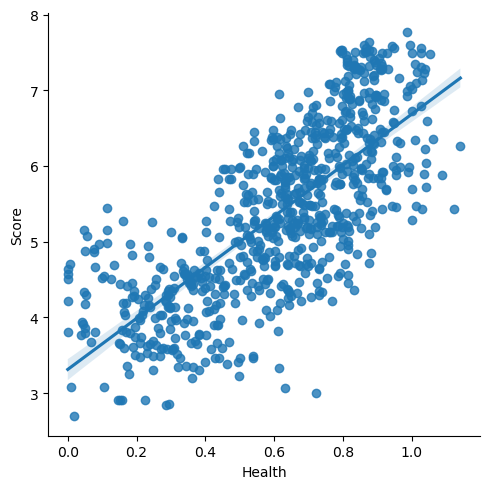

In [28]:
# Create a scatterplot for the 'Health' and 'Score' columns in seaborn

sns.lmplot(x = 'Health', y = 'Score', data = df)

#### A lot of data points are not very close to the trendline, but generally, the healthier a person is, the happier they are.

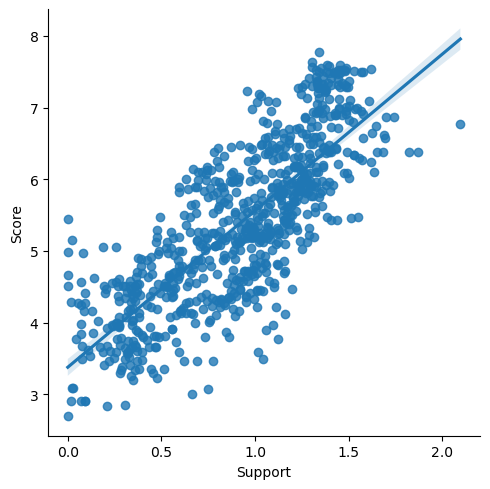

In [29]:
# Create a scatterplot for the 'Support' and 'Score' columns in seaborn

sns.lmplot(x = 'Support', y = 'Score', data = df)

#### The more family/social support a person in a particular country has, the higher their happiness score is.

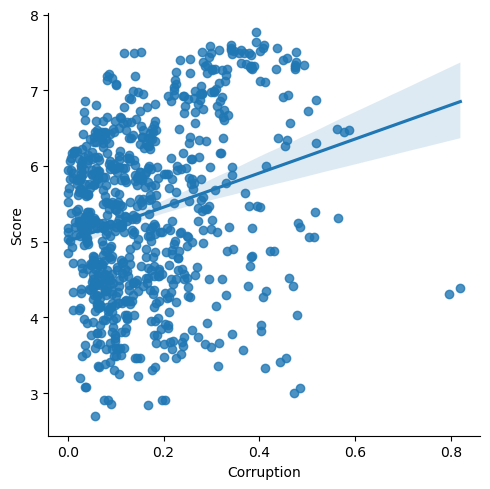

In [30]:
# Create a scatterplot for the 'Corruption' and 'Score' columns in seaborn

sns.lmplot(x = 'Corruption', y = 'Score', data = df)

#### The data points are skewed left (all under 0.6 except for 2 values). Data points are not grouped close above and below the trendline. Most of the countries with low corruption have a Happiness Score between 4 to 6. Countries with high corruption have a Happiness Score above 7.

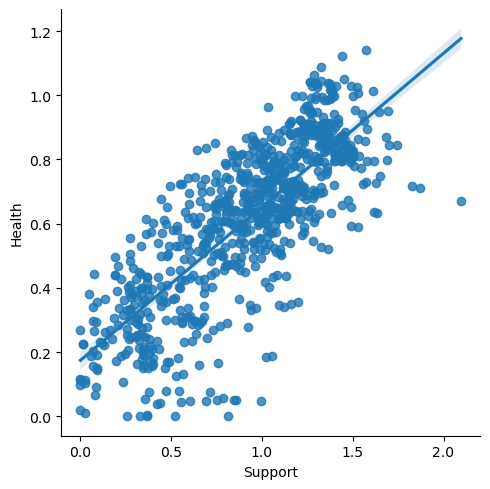

In [31]:
# Create a scatterplot for the 'Support' and 'Health' columns in seaborn

sns.lmplot(x = 'Support', y = 'Health', data = df)

#### Data points that are 0.1 or below on y-axis are not close to trendline and spread apart. The more family/social support a person has, the better their health is.

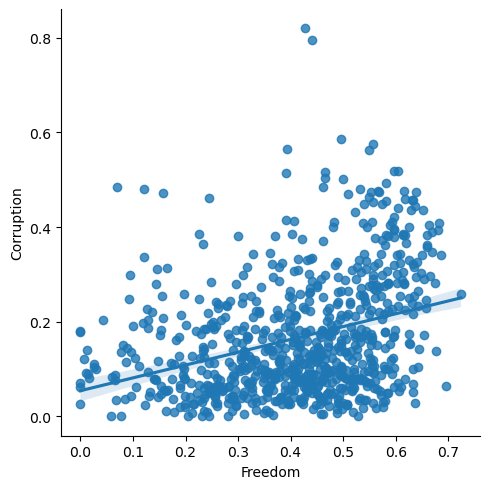

In [32]:
# Create a scatterplot for the 'Freedom' and 'Corruption' columns in seaborn

sns.lmplot(x = 'Freedom', y = 'Corruption', data = df)

#### Freedom and Corruption have a weak positive relationship. Data points are not grouped tightly around trendline and there are many outliers.

## Pair plots

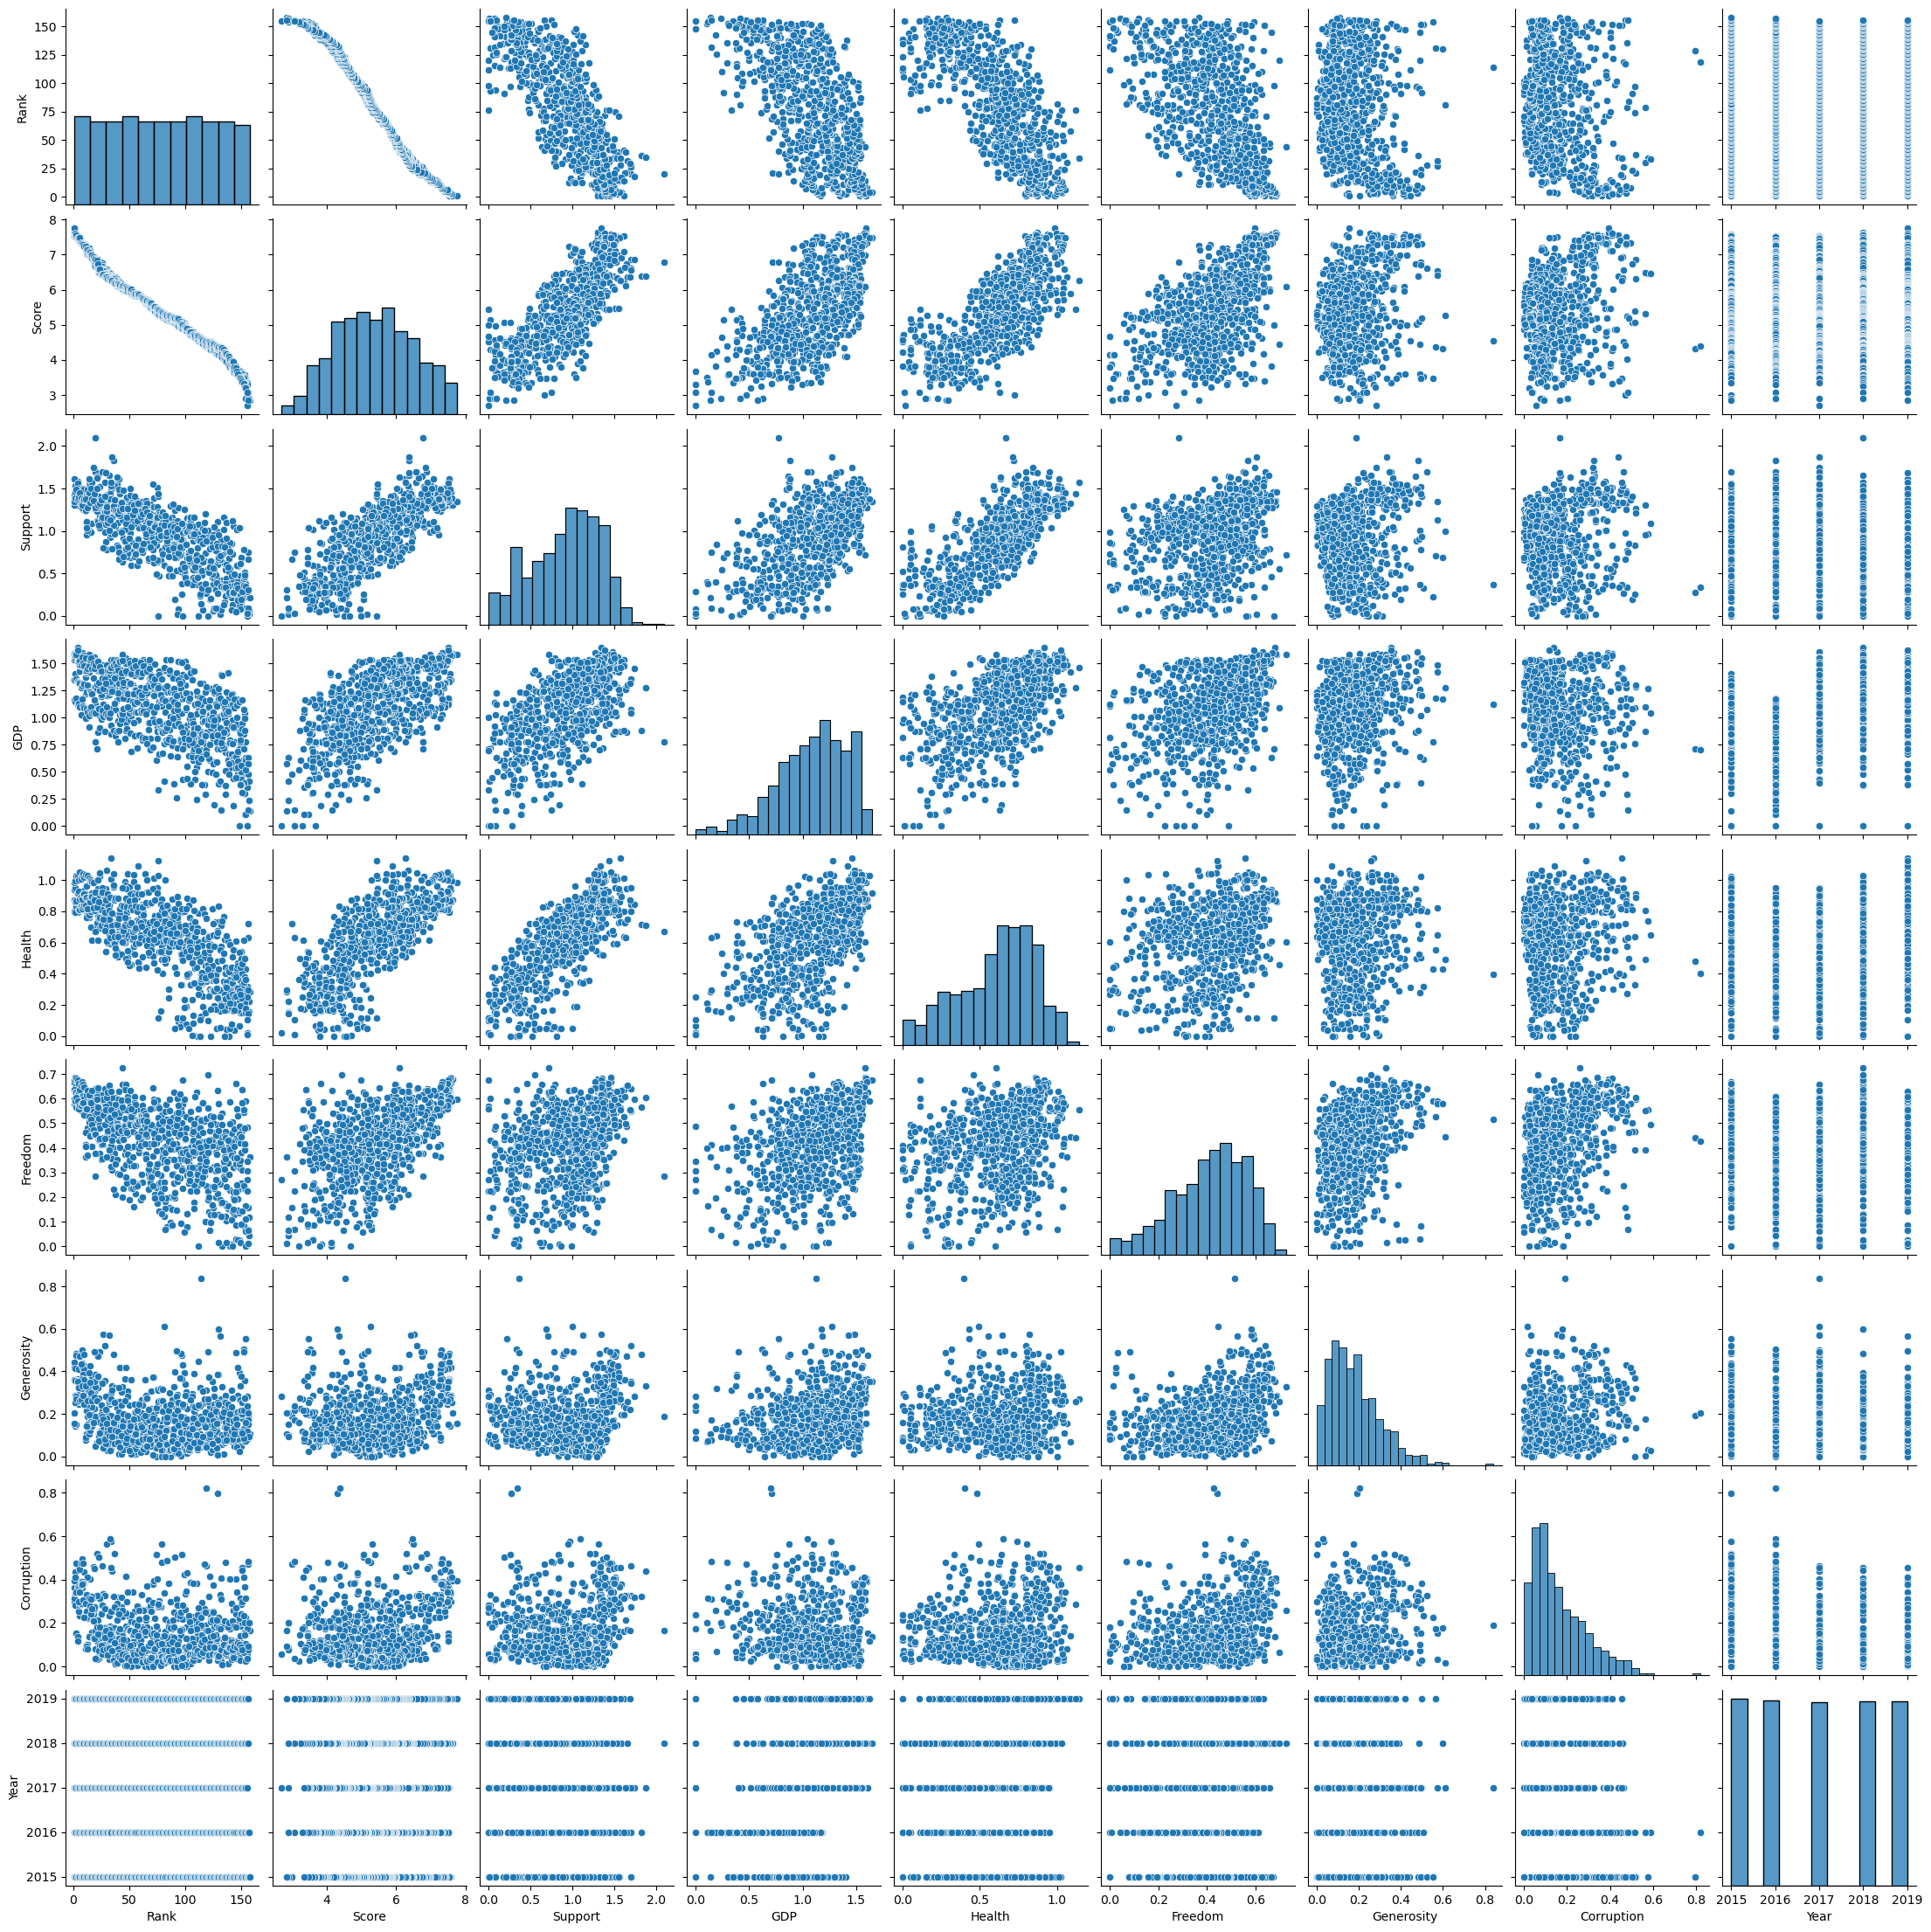

In [33]:
# create a pair plot of entire dataset

g = sns.pairplot(df)

#### Variables to analyze further:
        Health should be explored further because it seems as though the better a person's health, the higher the values for every other variable is.
        Generosity should be explored more to see if it has any impact on other variables.
        GDP and Freedom should be explored further as they have a positive relationship with other variables.

## Categorical plots

<Axes: xlabel='Score', ylabel='Count'>

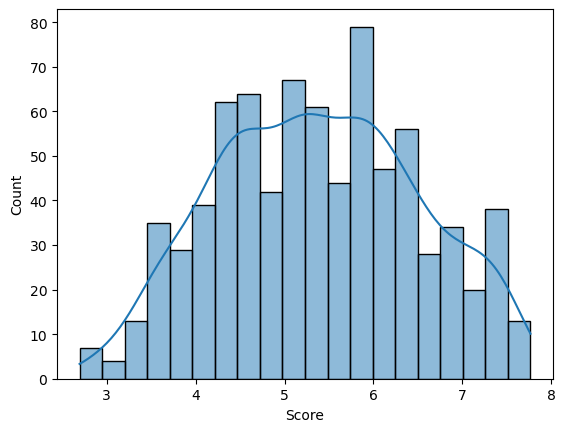

In [34]:
# Use a histogram to visualize the distribution of the variables.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df['Score'], bins = 20, kde = True)

In [35]:
df.loc[df['Score'] < 5, 'Score Category'] = 'Low score'

In [36]:
df.loc[(df['Score'] >= 5) & (df['Score'] <= 6), 'Score Category'] = 'Medium score'

In [37]:
df.loc[df['Score'] > 6, 'Score Category'] = 'High score'

In [38]:
df['Score Category'].value_counts(dropna = False)

Low score       298
Medium score    250
High score      234
Name: Score Category, dtype: int64

In [39]:
df.columns

Index(['Country', 'Rank', 'Score', 'Support', 'GDP', 'Health', 'Freedom',
       'Generosity', 'Corruption', 'Year', 'Score Category'],
      dtype='object')

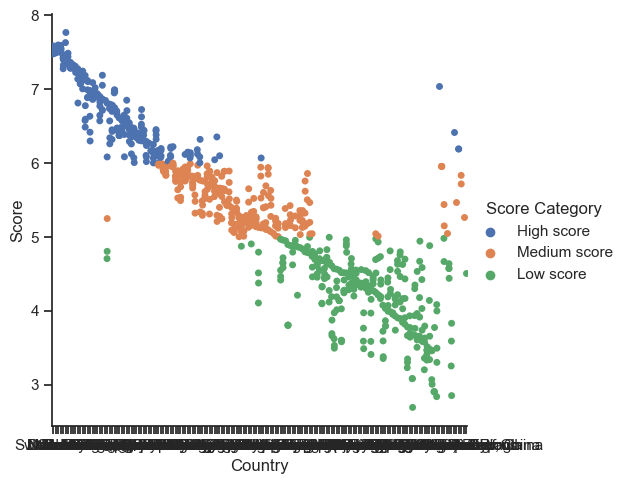

In [40]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style = 'ticks')
g = sns.catplot(x = 'Country', y = 'Score', hue = 'Score Category', data=df)

In [41]:
# fig = g.get_figure()

g.savefig("out.png") 

# Again, the image will be saved in the working directory.

Text(0.5, 1.0, 'Countries by Score Category')

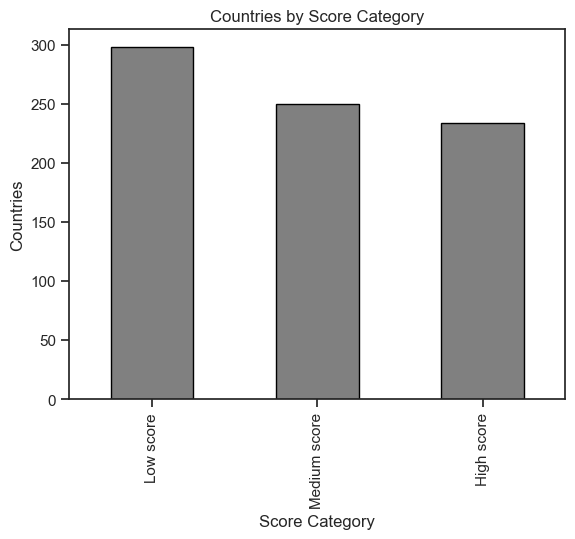

In [42]:
# create a bar chart

df['Score Category'].value_counts().plot.bar(color = ['grey'], ec = 'black')
plt.xlabel('Score Category')
plt.ylabel('Countries')
plt.title('Countries by Score Category')

#### Not sure how to plot only countries with low, medium or high score

# 04. Information gained from analysis

#### GDP has a strong positive correlation with Happiness Score, that is, if the GDP per capita of a country is higher than the Happiness Score of that country, it is also more likely to be high.
#### Support also has a strong and positive relationship with Happiness Score. So, it makes sense that we need social support to be happy. People are also wired for emotions, and we experience those emotions within a social context.
#### Health has a strong and positive relationship with the Happiness Score, that is, if the country has a High Life Expectancy, it can also have a high Happiness Score. Being happy doesn’t just improve the quality of a person’s life. It may increase the quantity of our life as well.
#### Freedom has a positive relationship with Happiness Score. Choice and autonomy are more directly related to happiness than having lots of money. It gives us options to pursue meaning in our life, finding activities that stimulate and excite us. This is an essential aspect of feeling happy.
#### Generosity has a weak relationship with the Happiness Score. Generosity scores are calculated based on the countries which give the most to nonprofits around the world. Countries that are not generous does not mean they are not happy.
#### Corruption has a weak reak positive relarionship with Happiness Score and the histogram is skewed left. Most of the countries with low corruption have a Happiness Score between 4 to 6. Countries with high corruption have a Happiness Score above 7.

# 05. Hypothesis

#### GDP, Health, and Support are strongly correlated with the Happiness score. Freedom correlates quite well with the Happiness score; however, Freedom connects quite well with all data. Corruption still has a mediocre correlation with the Happiness score.

#### If a country has a low score in GDP, Health, and Support, then they will have a low Happiness Score.